In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

#Переменная, которую надо предсказать - 'MEDV'.

print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- **CRIM** уровень преступности на душу населения по городам
- **ZN** доля жилой земли, выделенной на участки свыше 25 000 кв.фут.
- **INDUS**  доля акров не-розничного бизнеса в городе
- **CHAS** фиктивная переменная Charles River (= 1, Если ограничивает реку; 0 в противном случае)
- **NOX** концентрация оксидов азота (частей на 10 млн.)
- **RM** среднее количество комнат в одном жилом помещении
- **AGE** доля единиц, занятых владельцами, построенных до 1940 года ; 
- **DIS** взвешенные расстояния до пяти бостонских центров занятости
- **RAD** индекс доступности радиальных магистралей
- **TAX** Налог на недвижимость полной стоимости-ставка налога на 10,000
- **PTRATIO** соотношение ученик-учитель по городу
- **B** 1000 (Bk - 0.63)^2, где Bk-доля черных по городам.
- **LSTAT** % более низкий статус населения
- **MEDV** медианная стоимость домов, занятых владельцами ,в 1000

In [4]:
data.shape

(506, 14)

In [5]:
# Пустых значений нет
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# Смотрим основные метрики
data.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
# Очень крутая библиотека для EDA
pandas_profiling.ProfileReport(data)

# Много полезной инфы можно получить ничего не делая руками 

Number of variables,14
Number of observations,506
Total Missing (%),0.0%
Total size in memory,55.4 KiB
Average record size in memory,112.2 B
Numeric,12
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


# pandas_profiling предлагает (предупреждает в warning) 
1. убрать tax из-за большой корелляции с rad <br>
    *Действительно корреляция по Пирсону = 91 процент + видится логичным, что из доступности магистралей => лучшее положение относительно других => на хорошее жилье налог выше  => можем убрать*
2. обратить внимание на zn (много нулевых значений) <br>
    *По описанию переменной нули выглядят логичными. Доля не нулевых значений все равно весома (> 25 процентов) => оставляем*

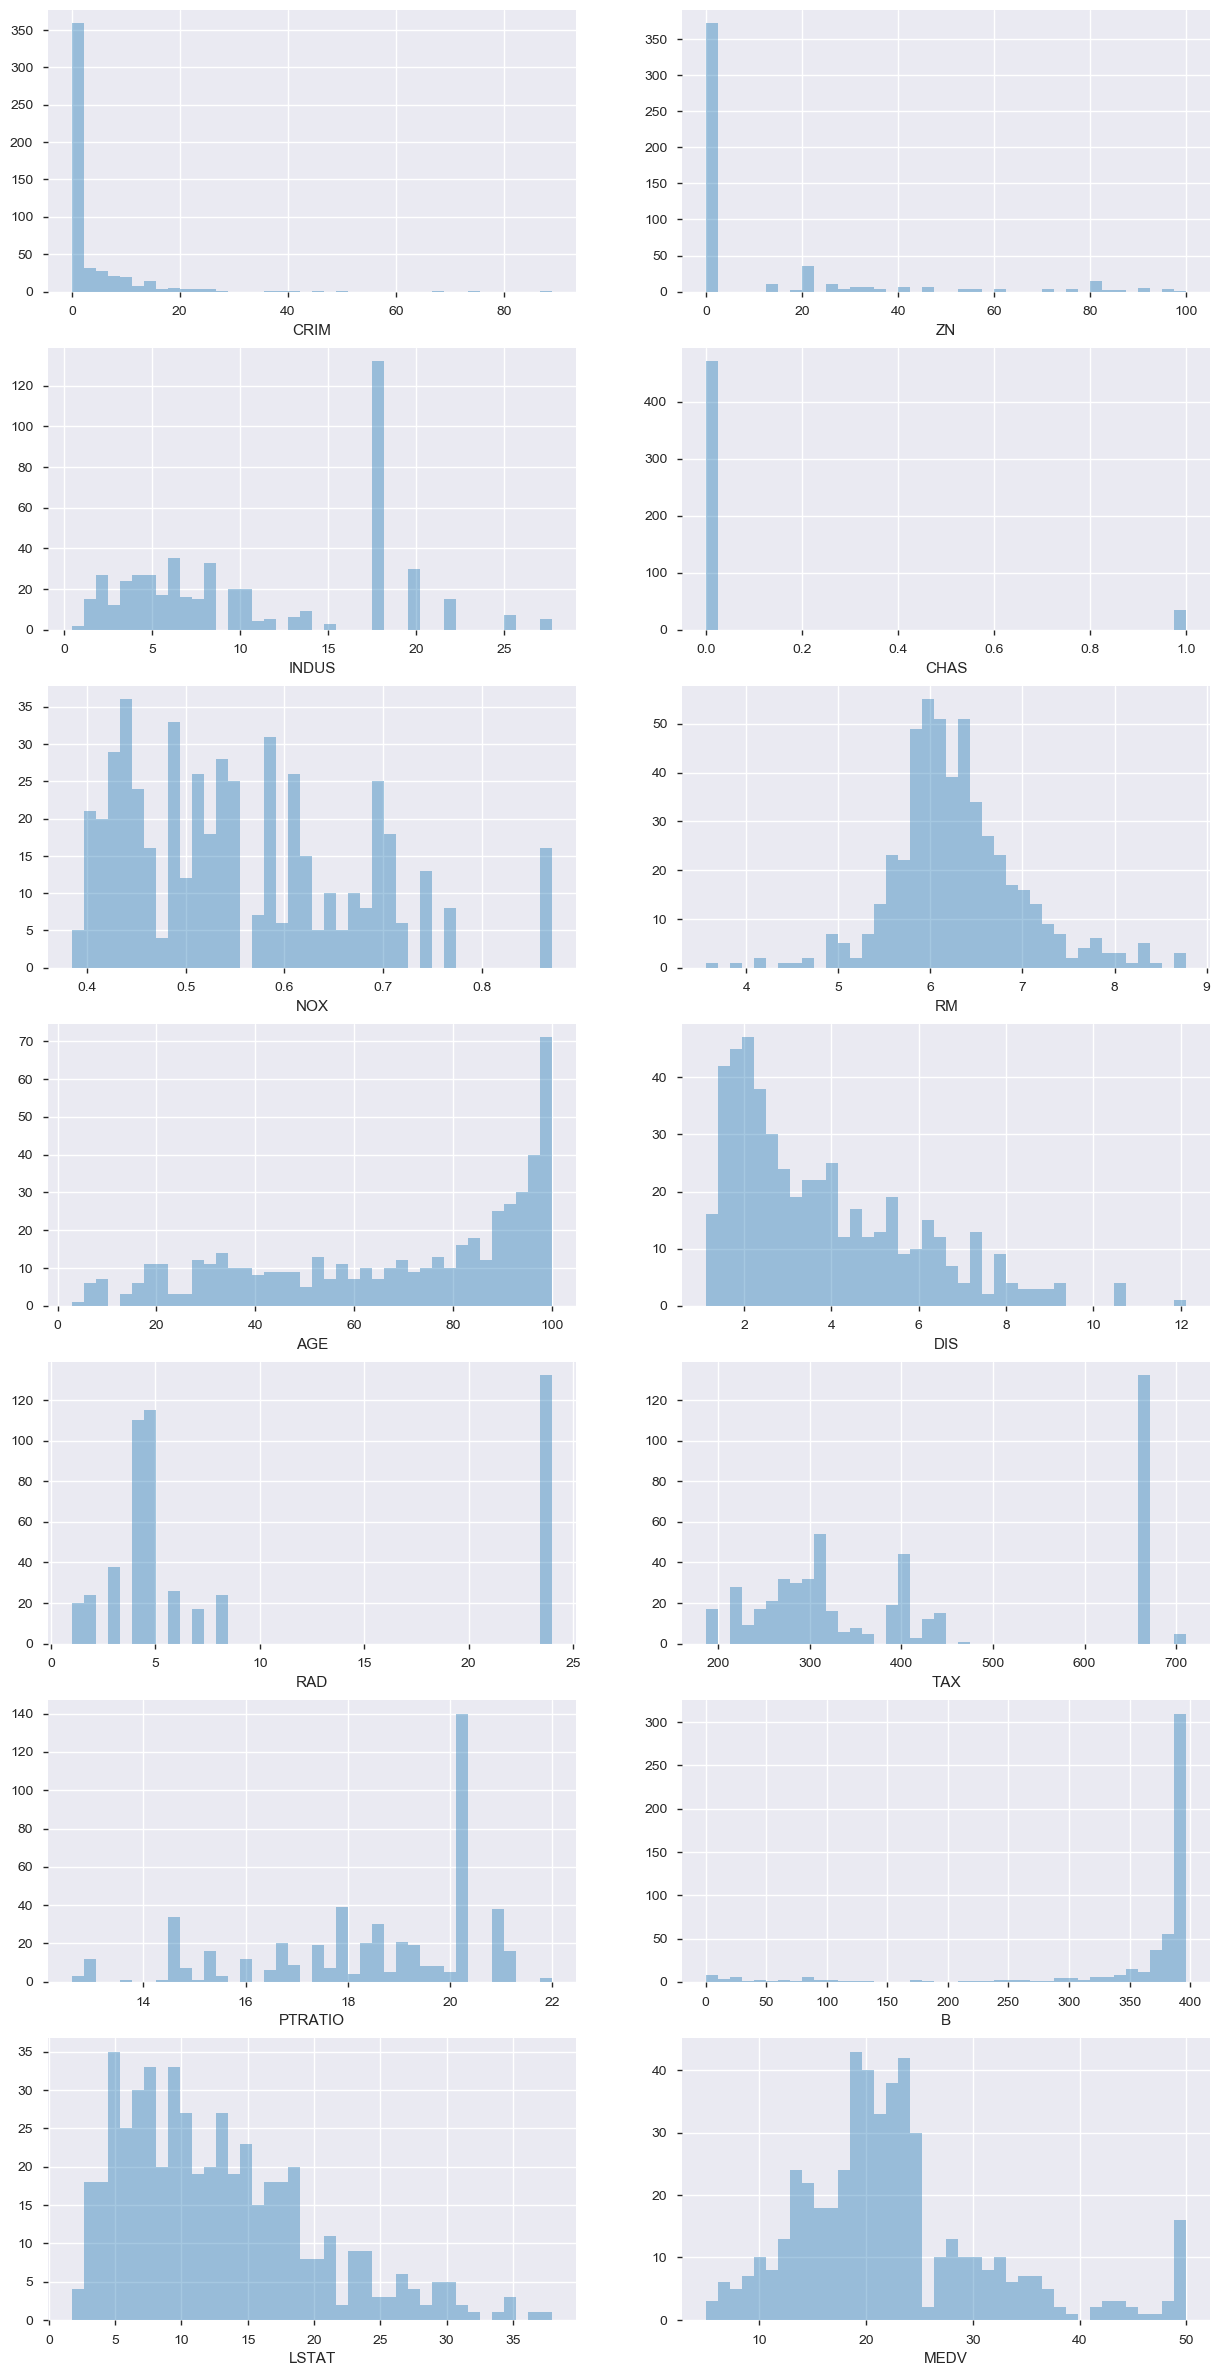

In [8]:
# Частотные графики с еще большей детализацией (для наглядности)
f, axes = plt.subplots(7, 2, figsize=(15, 30))

plt.rcParams["axes.labelsize"] = 10
bins_value = 40
i_counter = 0

for i in data.columns:
    g = sns.distplot(data[i], ax=axes[i_counter // 2, i_counter % 2], kde = False, bins = bins_value)
    i_counter += 1

plt.show()

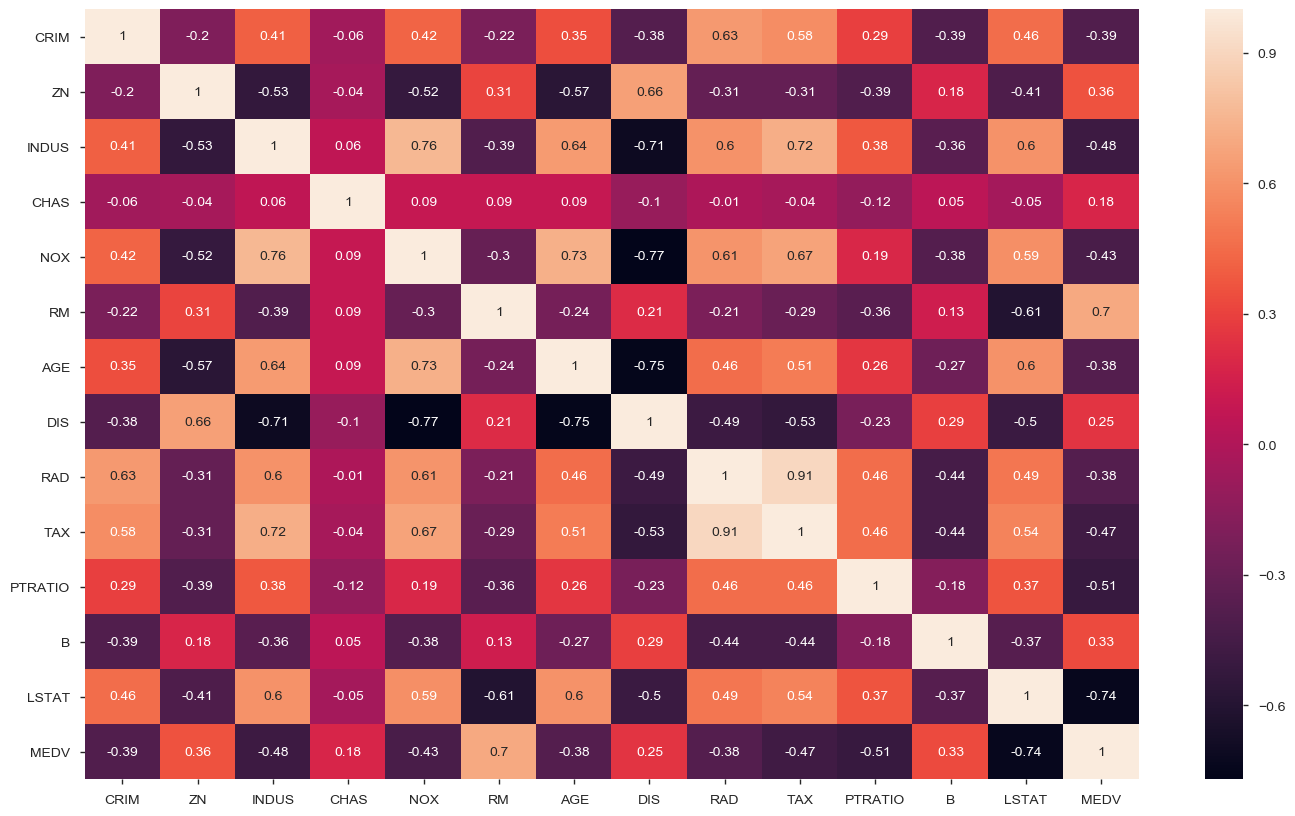

In [9]:
# Матрица корреляций:
correlation_matrix = data.corr().round(2)

# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(17,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

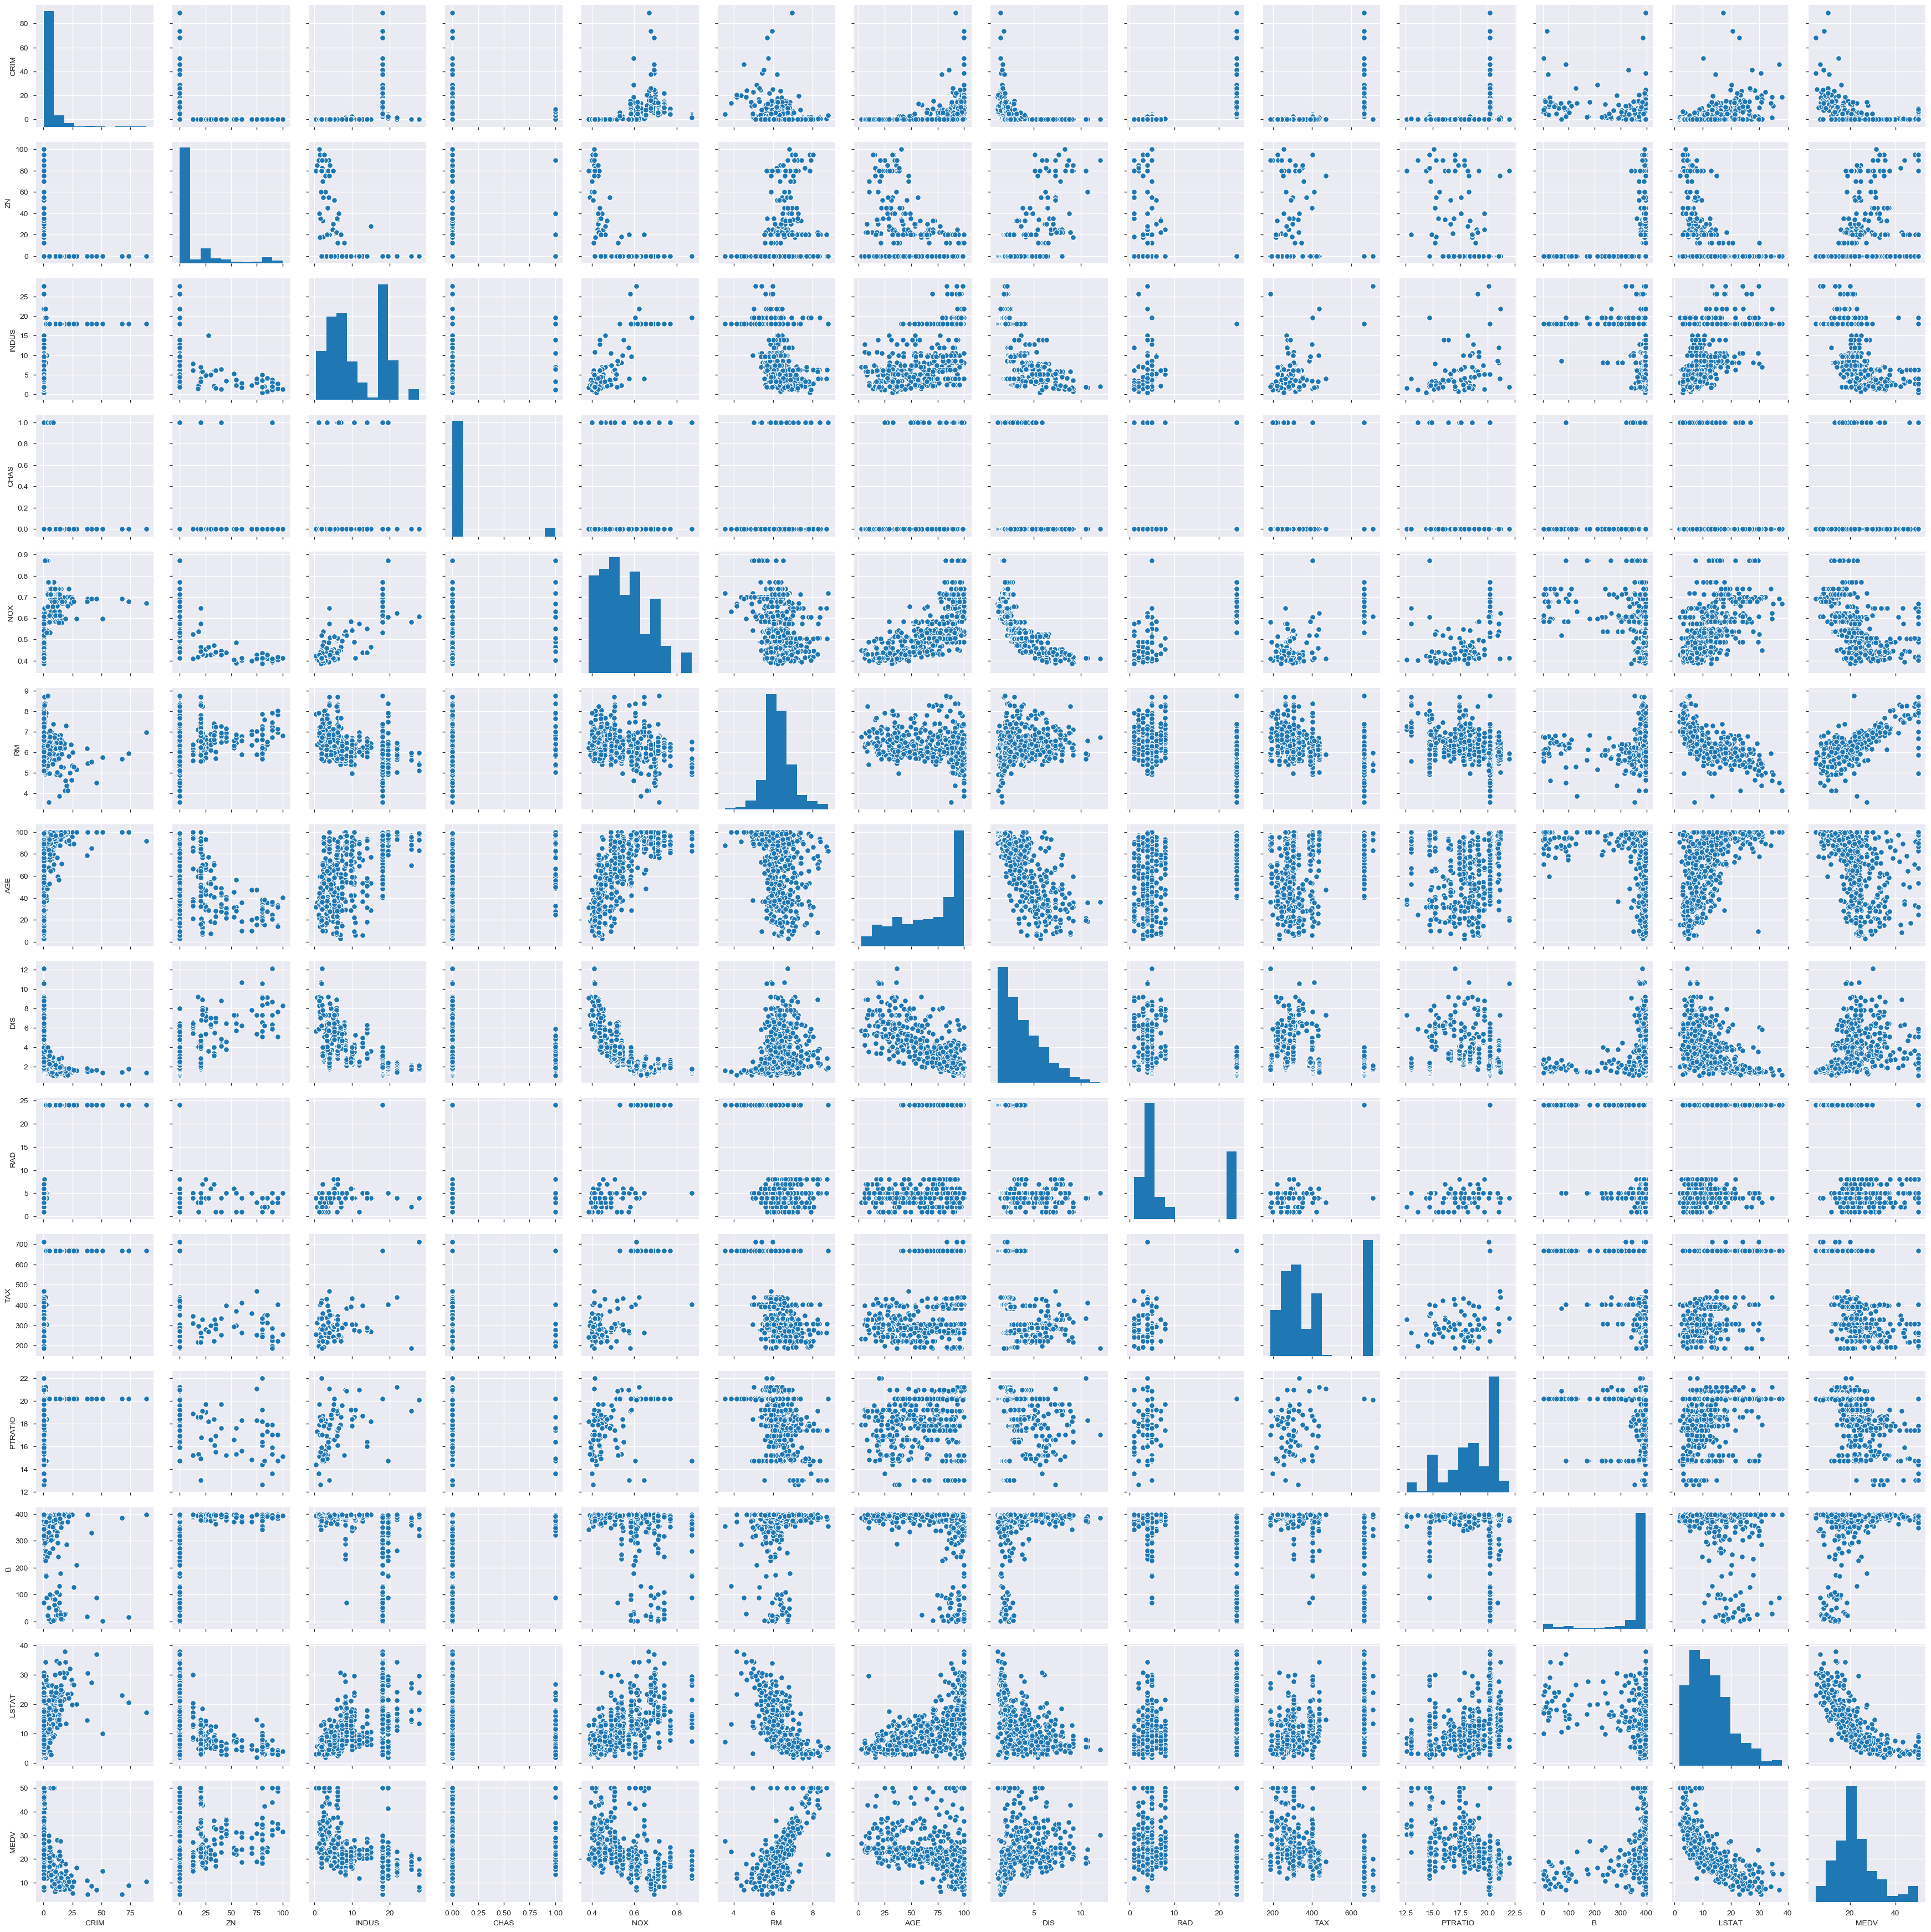

In [10]:
sns.pairplot(data)

**Хорошо видны корреляции в 60 - 70 процентов (из матриц)**

In [11]:
X = data.drop(['MEDV', 'TAX'], axis=1)
y = data[['MEDV']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [13]:
#создадим и обучим модель
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#Ki при x из уравнения линейной регрессии
model.coef_

array([[-1.22025883e-01,  3.69401043e-02, -1.34041470e-01,
         3.64153648e+00, -1.59535085e+01,  3.66818895e+00,
        -1.05398568e-02, -1.45636903e+00,  1.56543692e-01,
        -9.42071506e-01,  1.01535101e-02, -4.79193317e-01]])

In [15]:
#b - свободный член урованения линейной регрессии
model.intercept_

array([34.23047279])

# Оценка точности модели

In [16]:
# Оценим точность
model.score(X_test, y_test)

0.7837862306169568

In [17]:
# ЕСЛИ TAX оставить, то точность на тех же данных выше на 1%
# X1 = data.drop(['MEDV'], axis=1)
# y1 = data[['MEDV']]
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=3)
# model.fit(X1_train, y1_train)

# model.score(X1_test, y1_test)

# ДОПОЛНЕНИЕ ПО ЗАМЕЧАНИЯМ

1. *Значения MEDV подозрительно “отрезаны”. <br> 
То есть, значений выше 50ти нет. Это важный момент, который влияет на обучение. <br>
Ведь за этим стоит какой-то смысл. Отрезав этот “конец”, результаты получились бы гораздо лучше.*

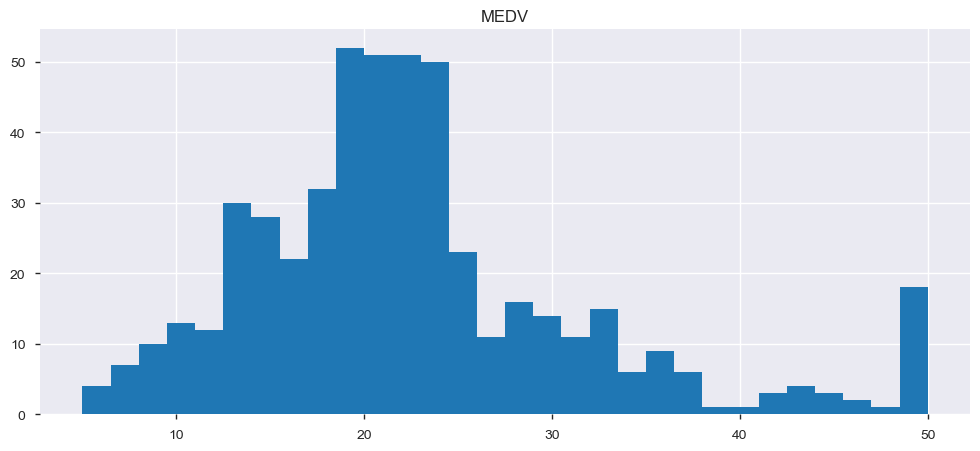

In [18]:
y.hist(bins=30, figsize=(12, 5))
plt.show()

In [19]:
# Посмотрим на данные, для которых MEDV больше 50:
# Вероятно MEDV "стоимость крутых домов" искуственно ограничена 50 тысячами. 
data.loc[(data['MEDV'] >= 50)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0


In [20]:
# Откинем 16 записей с MEDV = 50:
data = data[data['MEDV'] < 50]

2. *Посмотри на уровень налогов, там есть аномальные значения. <br>
Посмотри на этот 666, его сопутствующие значения.*

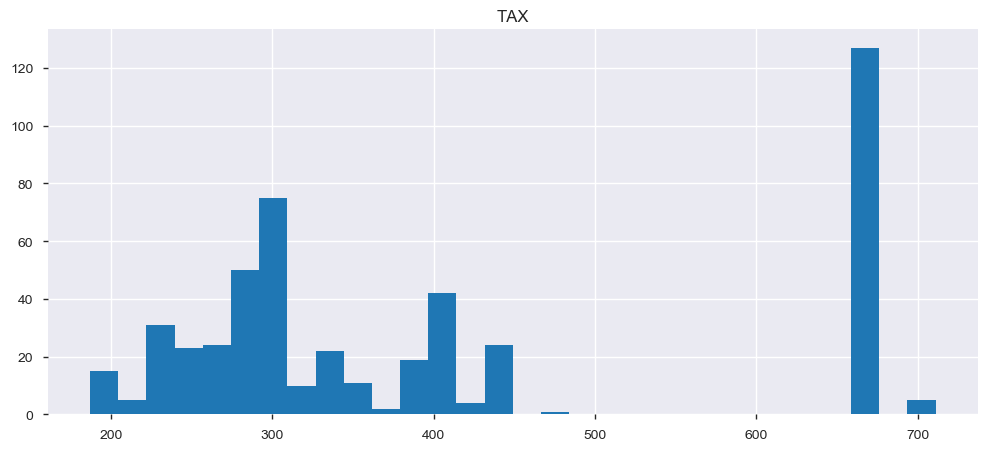

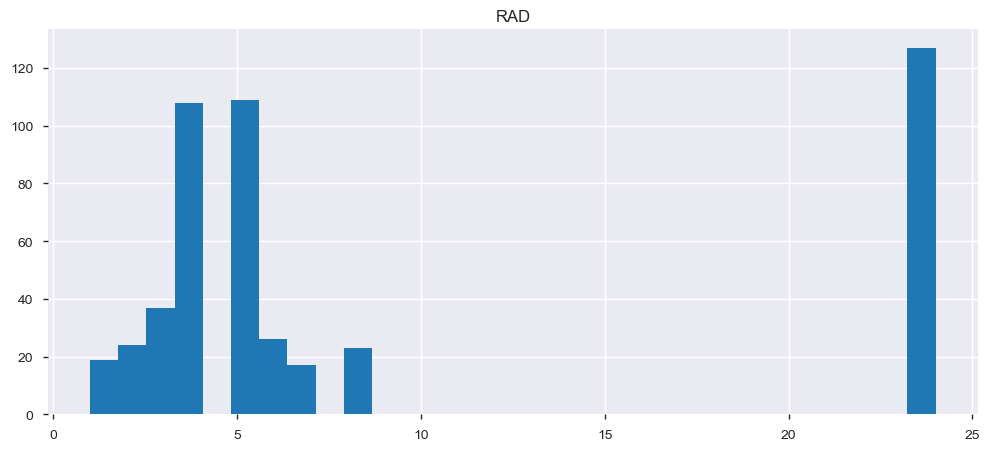

In [21]:
# TAX и RAD кореелируют на 91 %

data['TAX'].hist(bins = 30, figsize=(12, 5))
plt.title('TAX')
plt.show()

data['RAD'].hist(bins = 30, figsize=(12, 5))
plt.title('RAD')
plt.show()

In [22]:
# Посмотрим на эти аномалии
tax_n_rad = data[data['TAX'] > 600]

# Таких значений - 127
# tax_n_rad.groupby(['TAX', 'RAD']).count()

data.sample(50)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
312,0.26169,0.0,9.90,0,0.5440,6.023,90.4,2.8340,4,304,18.4,396.30,11.72,19.4
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
426,12.24720,0.0,18.10,0,0.5840,5.837,59.7,1.9976,24,666,20.2,24.65,15.69,10.2
146,2.15505,0.0,19.58,0,0.8710,5.628,100.0,1.5166,5,403,14.7,169.27,16.65,15.6
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
391,5.29305,0.0,18.10,0,0.7000,6.051,82.5,2.1678,24,666,20.2,378.38,18.76,23.2
165,2.92400,0.0,19.58,0,0.6050,6.101,93.0,2.2834,5,403,14.7,240.16,9.81,25.0
390,6.96215,0.0,18.10,0,0.7000,5.713,97.0,1.9265,24,666,20.2,394.43,17.11,15.1
424,8.79212,0.0,18.10,0,0.5840,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
149,2.73397,0.0,19.58,0,0.8710,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4


In [23]:
data1 = data[data['TAX'] < 600]

data1.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,358.0,0.376563,0.620910,0.00632,0.060543,0.130875,0.350705,4.0974
ZN,358.0,15.209497,25.541107,0.00000,0.000000,0.000000,22.000000,100.0000
INDUS,358.0,8.402346,5.926865,0.74000,4.050000,6.660000,10.010000,25.6500
CHAS,358.0,0.067039,0.250440,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,358.0,0.511169,0.101593,0.38500,0.437225,0.493000,0.544000,0.8710
RM,358.0,6.335726,0.606355,4.90300,5.926250,6.218500,6.635000,8.3980
AGE,358.0,60.377095,28.209364,2.90000,35.950000,61.900000,87.375000,100.0000
DIS,358.0,4.479447,2.102061,1.32160,2.742600,4.090250,5.957925,12.1265
RAD,358.0,4.452514,1.643843,1.00000,4.000000,4.000000,5.000000,8.0000
TAX,358.0,312.245810,67.303451,187.00000,270.000000,304.000000,380.500000,469.0000


In [24]:
data2 = data[data['TAX'] >= 600]

data2.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,132.0,12.502868,13.216389,0.10574,5.404117,8.88754,14.33370,88.9762
ZN,132.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.0000
INDUS,132.0,18.465152,1.847316,18.10000,18.100000,18.10000,18.10000,27.7400
CHAS,132.0,0.037879,0.191630,0.00000,0.000000,0.00000,0.00000,1.0000
NOX,132.0,0.671303,0.061816,0.53200,0.614000,0.69300,0.71300,0.7700
RM,132.0,6.000689,0.712621,3.56100,5.674250,6.13950,6.40725,8.7800
AGE,132.0,89.709848,12.611021,40.30000,85.325000,94.20000,98.80000,100.0000
DIS,132.0,2.085395,0.597438,1.13700,1.637600,1.95120,2.43130,4.0983
RAD,132.0,23.242424,3.832607,4.00000,24.000000,24.00000,24.00000,24.0000
TAX,132.0,667.704545,8.623365,666.00000,666.000000,666.00000,666.00000,711.0000


RAD = 24 (TAX = 666), вероятно, соответстует определенному району Бостона (или пригороду)
* Там сильно выше преступность;
* Там нет больших домов;
* Более старый жилой фонд;
* Большая удаленность до магистралей;
* Больше бедных;
* Ниже стоимость жилья

Наверно, гетто :-) <br>
Возможно, пригород

3. *Исследовать качество модели по R2 не стоит, у него много “подводных камней”. Используй RMSE или MAE (я показывал в лекции)*

# Оценим модель

In [25]:
# Берем последнюю версию data с учетом 
# - отброшенных аномалий MEDV
# - уберем "пригород"
data = data[data['RAD'] != 24]

X1 = data.drop(['MEDV', 'TAX'], axis=1)
y1 = data[['MEDV']]

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=3)

In [27]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

y_pred = model.predict(X_test)

In [28]:
# Сравним с тем, что было:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# До корректировок
print("Оценка старой модели: \t")
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2), '\n')

# Новая
print("Оценка новой модели: \t")
print("R2: \t", r2_score(y1_test, y1_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y1_test, y1_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y1_test, y1_pred), 2))

Оценка старой модели: 	
R2: 	 0.7837862306169568
RMSE: 	 4.23
MAE: 	 3.1 

Оценка новой модели: 	
R2: 	 0.8045755694111479
RMSE: 	 3.19
MAE: 	 2.38
